In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def  skeletonize(input_image):
    skeleton = np.zeros_like(input_image, dtype=np.uint8)
    structuring_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    intermediate_steps = []

    current_image = input_image.copy()
    while True:
        eroded_image = cv2.erode(current_image, structuring_element)
        opened_image = cv2.morphologyEx(eroded_image, cv2.MORPH_OPEN, structuring_element)
        temp_image = cv2.subtract(eroded_image, opened_image)
        skeleton = cv2.bitwise_or(skeleton, temp_image)
        intermediate_steps.append(temp_image)
        current_image = eroded_image.copy()
        if cv2.countNonZero(current_image) == 0:
            break

    return skeleton, intermediate_steps


In [13]:
import numpy as np
import cv2

def recreate(intermediate_steps, output_shape):
    reconstructed_image = np.zeros(shape=output_shape, dtype=np.uint8)
    structuring_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    for step in intermediate_steps:
        reconstructed_image = cv2.bitwise_or(step, reconstructed_image)
        for _ in range(len(intermediate_steps)):
            reconstructed_image = cv2.bitwise_or(reconstructed_image, cv2.dilate(step, structuring_element))

    return reconstructed_image


In [14]:
img1 = cv2.imread('./images/q8_5.jpg')
img2 = cv2.imread('./images/q8_6.png')
img3 = cv2.imread('./images/q8_7.png')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

_, binary_image_1 = cv2.threshold(gray1,100,255,cv2.THRESH_BINARY)
_, binary_image_2 = cv2.threshold(gray2,100,255,cv2.THRESH_BINARY)
_, binary_image_3 = cv2.threshold(gray3,100,255,cv2.THRESH_BINARY)

skeleton1, skeleton_list1 = skeletonize(binary_image_1)
backup1 = recreate(skeleton_list1, binary_image_1.shape)

skeleton2, skeleton_list2 = skeletonize(binary_image_2)
backup2 = recreate(skeleton_list2, binary_image_2.shape)

skeleton3, skeleton_list3 = skeletonize(binary_image_3)
backup3 = recreate(skeleton_list3, binary_image_3.shape)

In [15]:
def retrieve_original_image(skeleton_image, k):
    dilated_image = skeleton_image.copy()
    for i in range(k):
        dilated_image = cv2.dilate(dilated_image, np.ones((3, 3), dtype=np.uint8))
    original_image = cv2.bitwise_or(skeleton_image, dilated_image)

    return original_image

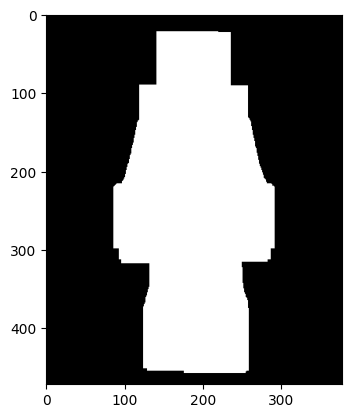

In [16]:
plt.imshow(retrieve_original_image(skeleton1, len(skeleton_list1)), cmap='gray')

(-0.5, 377.5, 471.5, -0.5)

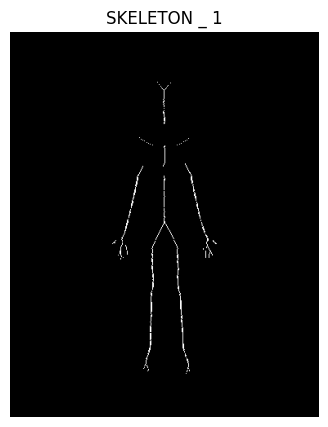

In [22]:
plt.figure(figsize=(5, 5))

# plt.subplot(1, 3, 1)
plt.imshow(skeleton1, cmap='gray')
plt.title('SKELETON _ 1')
plt.axis('off')


(-0.5, 799.5, 799.5, -0.5)

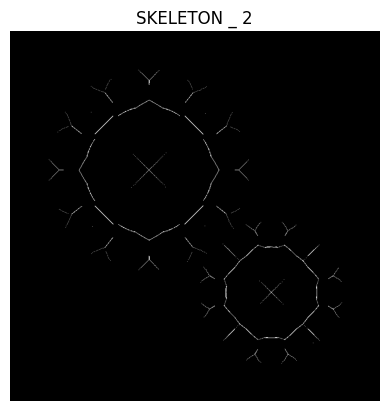

In [23]:

plt.imshow(skeleton2, cmap='gray')
plt.title('SKELETON _ 2')
plt.axis('off')


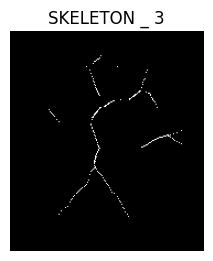

In [24]:

plt.subplot(1, 3, 3)
plt.imshow(skeleton3, cmap='gray')
plt.title('SKELETON _ 3')
plt.axis('off')

plt.tight_layout()
plt.savefig('./images/q8_PartA_Result.jpg')
plt.show()

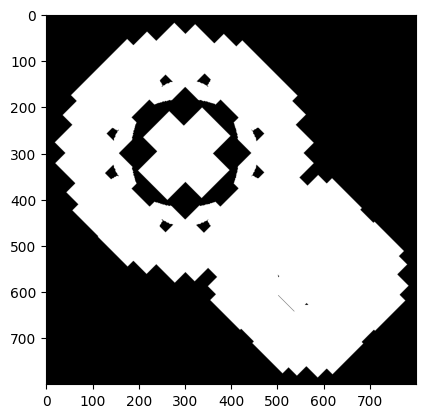

In [19]:
def generate_binary_image(skeleton_list, kernel):
    binary_image = np.zeros_like(skeleton_list[0], dtype=np.uint8)
    for skeleton in skeleton_list:
        binary_image = cv2.dilate(binary_image, kernel)
        binary_image = cv2.bitwise_or(binary_image, skeleton)

    return binary_image

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
binary_image_reconstructed = generate_binary_image(skeleton_list2, kernel)
plt.imshow(binary_image_reconstructed, cmap='gray')